# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: Real estate investors who are looking to buy property in Austin, Texas.

What: Show which factors make Austin homes more valuable and help investors spot good buying opportunities. We need them to understand why certain homes cost more and where the best investments might be. 

How: Use our Austin housing dataset to show: 
- How home prices have changed over time 
- Which neighborhoods are getting more expensive 
- What features (like bedrooms, location, size) affect price the most 
- Use both regular data and home photos to predict prices 

# 3. Homework - work with your own data

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_csv('/Users/sameeiya/Downloads/austinHousingData2.csv')

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [7]:
#To summarize the dataset, we can use info() and describe(). From info() I can see there are 47 columns in the data, the column names, if the column can be null or not and the data type of each column. From describe() we can see the count of records, mean, standard deviation, min, max and percentiles of the dataset. 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [9]:
#To check if there are any duplicate rows we can use the below function. The output is 0 so there are no duplicate rows
df.duplicated().sum()

0

In [11]:
#To check if there are any duplicate values in a given column we can use the below loop. All columns have duplicate values in its column except for the zpid and homeImage column. 
for column in df.columns:
    print(f"{column}: {df[column].duplicated().sum()}")

zpid: 0
city: 15162
streetAddress: 7
zipcode: 15123
description: 38
latitude: 761
longitude: 2691
propertyTaxRate: 15168
garageSpaces: 15157
hasAssociation: 15169
hasCooling: 15169
hasGarage: 15169
hasHeating: 15169
hasSpa: 15169
hasView: 15169
homeType: 15161
parkingSpaces: 15157
yearBuilt: 15056
latestPrice: 12806
numPriceChanges: 15149
latest_saledate: 14213
latest_salemonth: 15159
latest_saleyear: 15167
latestPriceSource: 14946
numOfPhotos: 15020
numOfAccessibilityFeatures: 15163
numOfAppliances: 15158
numOfParkingFeatures: 15164
numOfPatioAndPorchFeatures: 15162
numOfSecurityFeatures: 15164
numOfWaterfrontFeatures: 15168
numOfWindowFeatures: 15166
numOfCommunityFeatures: 15162
lotSizeSqFt: 13745
livingAreaSqFt: 11521
numOfPrimarySchools: 15168
numOfElementarySchools: 15168
numOfMiddleSchools: 15167
numOfHighSchools: 15168
avgSchoolDistance: 14809
avgSchoolRating: 15144
avgSchoolSize: 15011
MedianStudentsPerTeacher: 15161
numOfBathrooms: 15149
numOfBedrooms: 15160
numOfStories: 151

In [13]:
# To check the mean, median and mode of each column we need to select only the numeric columns then check for the values as below.
numeric_df = df.select_dtypes(include=[np.number])
print("Mean:\n", numeric_df.mean())
print("Median:\n", numeric_df.median())
print("Mode:\n", numeric_df.mode().iloc[0])

Mean:
 zpid                          1.044193e+08
zipcode                       7.873593e+04
latitude                      3.029160e+01
longitude                    -9.777853e+01
propertyTaxRate               1.994085e+00
garageSpaces                  1.229187e+00
parkingSpaces                 1.224507e+00
yearBuilt                     1.988555e+03
latestPrice                   5.127677e+05
numPriceChanges               3.032892e+00
latest_salemonth              6.733043e+00
latest_saleyear               2.019078e+03
numOfPhotos                   3.064043e+01
numOfAccessibilityFeatures    1.298530e-02
numOfAppliances               3.474722e+00
numOfParkingFeatures          1.710105e+00
numOfPatioAndPorchFeatures    6.633709e-01
numOfSecurityFeatures         4.668776e-01
numOfWaterfrontFeatures       2.768440e-03
numOfWindowFeatures           2.084899e-01
numOfCommunityFeatures        1.885176e-02
lotSizeSqFt                   1.190840e+05
livingAreaSqFt                2.208323e+03
numO

In [19]:
#To check if there are any missing values we can use the functions below. It looks like only the description field has 2 missing values. We will drop the records.
df.isnull().sum()
df_dropna = df.dropna()

#We will now be referring to the dataset as df_dropna

In [21]:
#To identify any inconsistent data, I checked a few numeric columns to see if there were any negative values since we would expect only positive values in these columns. It looks like there are none. 
df_dropna[df_dropna['propertyTaxRate'] < 0]  
df_dropna[df_dropna['latestPrice'] < 0]  
df_dropna[df_dropna['lotSizeSqFt'] < 0]  
df_dropna[df_dropna['livingAreaSqFt'] < 0] 

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage


In [23]:
#To encode a categorical column with one hot encoding we'll perform this as below using the hasGarage column. This now outputs 2 new columns hasGarage_False and hasGarage_True 
df_onehot = pd.get_dummies(df_dropna, columns=['hasGarage'])

In conclusion, the dataset looks usable to me. There are a good variety of fields to make an analysis out of. There are both categorical and numeric fields. I do not think the dataset needs to be modified. We have already cleaned up the rows with missing values and I didn't find any data inconsistencies. There doesn't look to be a class imbalance. There's a good variety of columns that have only a few items, boolean columns for example and there are also columns that will have more items such as zipcode and street address.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

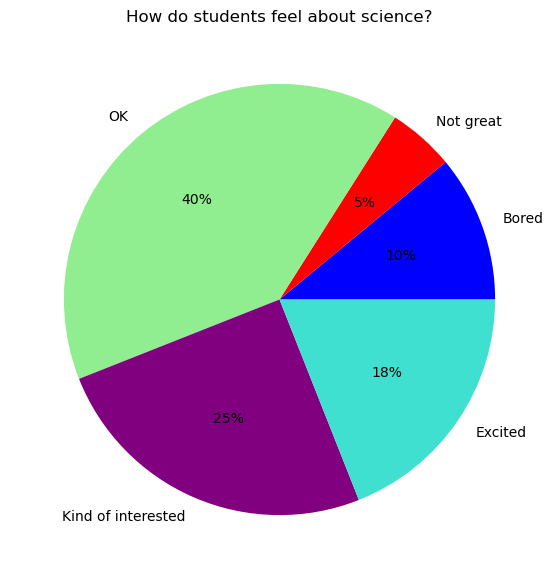

In [28]:
import matplotlib.pyplot as plt 
labels = ['Bored', 'Not great', 'OK', 'Kind of interested', 'Excited'] 

sizes = [11, 5, 40, 25, 19] 

colors = ['blue', 'red', 'lightgreen', 'purple', 'turquoise'] 
 
plt.figure(figsize=(7, 7)) 
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%d%%') 

plt.title('How do students feel about science?')  

plt.show()